In [1]:
import glob
import sys

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

sys.path.append("../../../")

from helpers.experiment import experiment



Commencing Experiment: KNeighborsClassifier_dataset_00_all

Training accuracy: train_accuracy = 0.661827

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9091  0.0267    0.0519      374  0.1539
  genre_classical     0.8630  0.8564    0.8597     4221  0.8139
    genre_country     0.9351  0.2202    0.3564      327  0.4498
      genre_disco     0.5728  0.2042    0.3010      289  0.3357
     genre_hiphop     0.7150  0.5015    0.5895     1701  0.5632
       genre_jazz     0.5794  0.5383    0.5581     1241  0.5252
      genre_metal     0.8596  0.3684    0.5158      665  0.5527
        genre_pop     0.5238  0.7616    0.6207     4274  0.4776
     genre_reggae     0.7148  0.5025    0.5902      788  0.5836
       genre_rock     0.6456  0.6659    0.6556     3200  0.5748
                                                               
         accuracy                       0.6618 

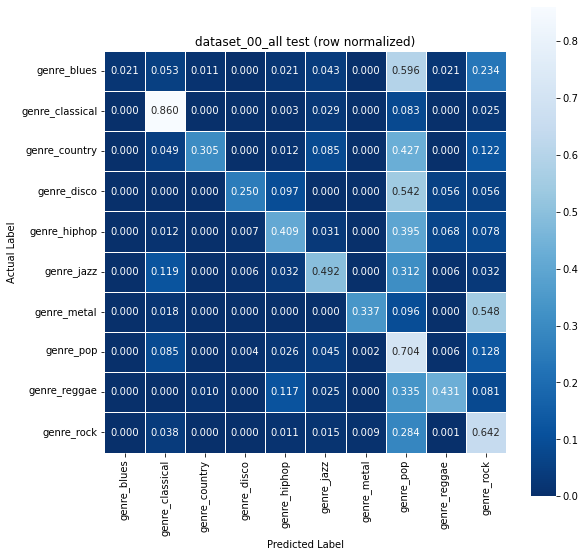



Commencing Experiment: KNeighborsClassifier_dataset_01_mean

Training accuracy: train_accuracy = 0.569028

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0107    0.0212      374  0.1023
  genre_classical     0.7330  0.8837    0.8013     4221  0.7337
    genre_country     0.9714  0.1040    0.1878      327  0.3149
      genre_disco     0.2727  0.0415    0.0721      289  0.1008
     genre_hiphop     0.4869  0.3169    0.3839     1701  0.3405
       genre_jazz     0.4907  0.2562    0.3367     1241  0.3198
      genre_metal     0.7353  0.2632    0.3876      665  0.4279
        genre_pop     0.4521  0.6680    0.5392     4274  0.3569
     genre_reggae     0.4906  0.1320    0.2080      788  0.2375
       genre_rock     0.5750  0.6088    0.5914     3200  0.4942
                                                               
         accuracy                       0.5690

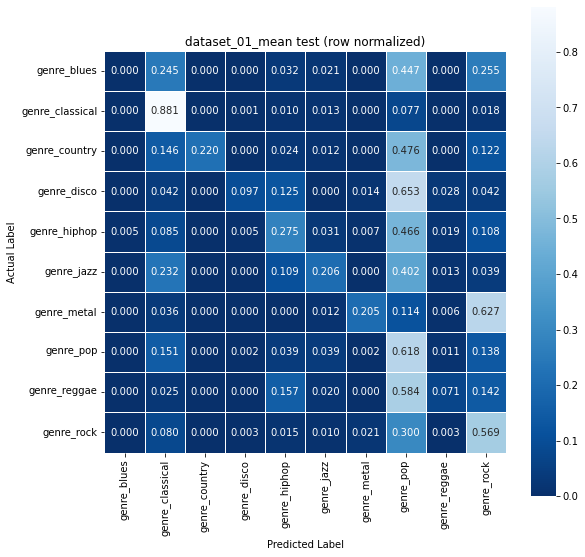



Commencing Experiment: KNeighborsClassifier_dataset_02_mean_cov

Training accuracy: train_accuracy = 0.606148

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.7500  0.0080    0.0159      374  0.0761
  genre_classical     0.7701  0.8714    0.8176     4221  0.7554
    genre_country     0.9688  0.1896    0.3171      327  0.4250
      genre_disco     0.3250  0.0450    0.0790      289  0.1157
     genre_hiphop     0.5921  0.3098    0.4068     1701  0.3856
       genre_jazz     0.5842  0.4359    0.4993     1241  0.4719
      genre_metal     0.7524  0.3519    0.4795      665  0.5023
        genre_pop     0.4871  0.6572    0.5595     4274  0.3904
     genre_reggae     0.5583  0.4797    0.5160      788  0.4960
       genre_rock     0.5815  0.6587    0.6177     3200  0.5243
                                                               
         accuracy                       0.

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

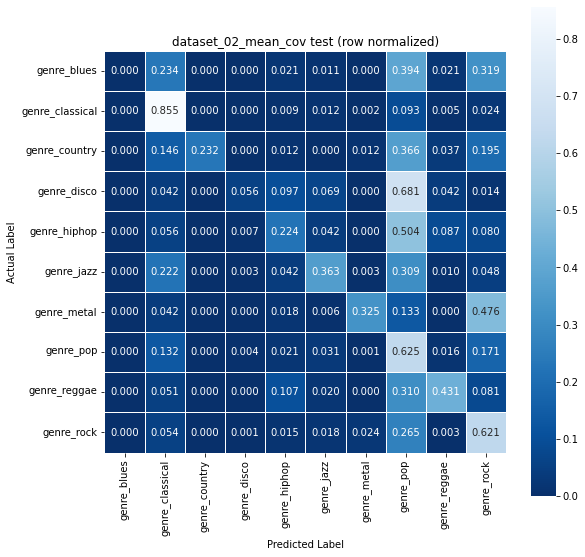



Commencing Experiment: KNeighborsClassifier_dataset_03_mean_icov

Training accuracy: train_accuracy = 0.569204

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0107    0.0212      374  0.1023
  genre_classical     0.7332  0.8830    0.8012     4221  0.7335
    genre_country     0.9714  0.1040    0.1878      327  0.3149
      genre_disco     0.2667  0.0415    0.0719      289  0.0995
     genre_hiphop     0.4887  0.3186    0.3858     1701  0.3424
       genre_jazz     0.4923  0.2571    0.3377     1241  0.3210
      genre_metal     0.7404  0.2617    0.3867      665  0.4283
        genre_pop     0.4519  0.6680    0.5391     4274  0.3567
     genre_reggae     0.4929  0.1320    0.2082      788  0.2382
       genre_rock     0.5752  0.6097    0.5919     3200  0.4948
                                                               
         accuracy                       0

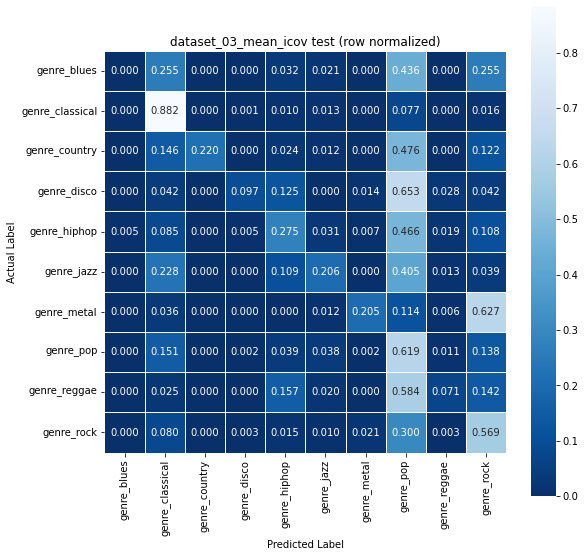



Commencing Experiment: KNeighborsClassifier_dataset_04_mean_cov_icov

Training accuracy: train_accuracy = 0.606206

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.7500  0.0080    0.0159      374  0.0761
  genre_classical     0.7706  0.8714    0.8179     4221  0.7557
    genre_country     0.9688  0.1896    0.3171      327  0.4250
      genre_disco     0.3250  0.0450    0.0790      289  0.1157
     genre_hiphop     0.5921  0.3098    0.4068     1701  0.3856
       genre_jazz     0.5853  0.4367    0.5002     1241  0.4729
      genre_metal     0.7524  0.3519    0.4795      665  0.5023
        genre_pop     0.4869  0.6575    0.5595     4274  0.3903
     genre_reggae     0.5577  0.4784    0.5150      788  0.4950
       genre_rock     0.5815  0.6587    0.6177     3200  0.5243
                                                               
         accuracy                    

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

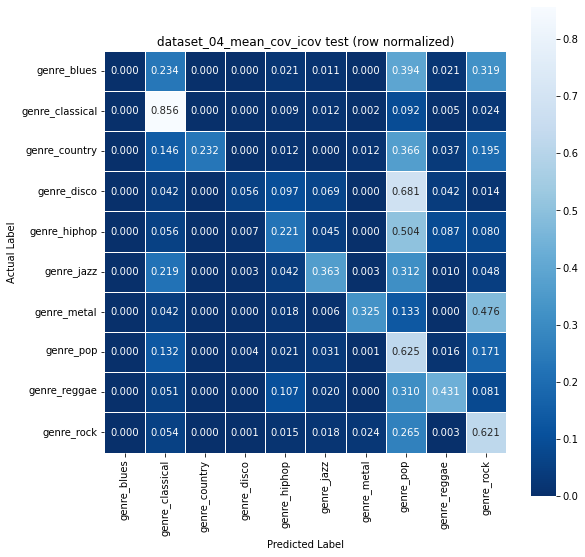



Commencing Experiment: KNeighborsClassifier_dataset_05_pvtt

Training accuracy: train_accuracy = 0.556440

record saved
                   precision  recall  f1-score  support      mcc
                                                                
      genre_blues     0.0000  0.0000    0.0000      374  -0.0011
  genre_classical     0.8064  0.8595    0.8321     4221   0.7754
    genre_country     0.4545  0.0153    0.0296      327   0.0807
      genre_disco     0.3256  0.0484    0.0843      289   0.1202
     genre_hiphop     0.3947  0.3568    0.3748     1701   0.3100
       genre_jazz     0.4594  0.2828    0.3501     1241   0.3224
      genre_metal     0.6712  0.0737    0.1328      665   0.2142
        genre_pop     0.4390  0.6511    0.5245     4274   0.3348
     genre_reggae     0.4392  0.2107    0.2847      788   0.2818
       genre_rock     0.5536  0.5941    0.5731     3200   0.4708
                                                                
         accuracy                

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

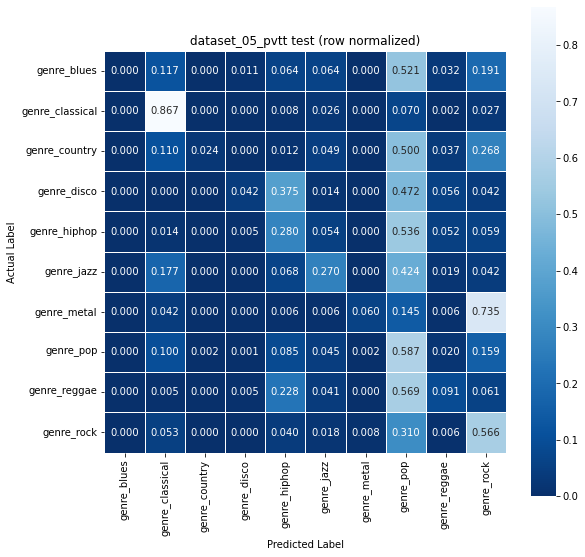



Commencing Experiment: KNeighborsClassifier_dataset_06_pvtt_mean

Training accuracy: train_accuracy = 0.599883

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0080    0.0159      374  0.0886
  genre_classical     0.8128  0.8825    0.8462     4221  0.7941
    genre_country     0.8824  0.1376    0.2381      327  0.3447
      genre_disco     0.4138  0.0830    0.1383      289  0.1796
     genre_hiphop     0.4785  0.3786    0.4227     1701  0.3700
       genre_jazz     0.5379  0.3143    0.3967     1241  0.3774
      genre_metal     0.7225  0.2466    0.3677      665  0.4101
        genre_pop     0.4733  0.6949    0.5631     4274  0.3925
     genre_reggae     0.5235  0.2690    0.3554      788  0.3546
       genre_rock     0.6073  0.6466    0.6263     3200  0.5372
                                                               
         accuracy                       0

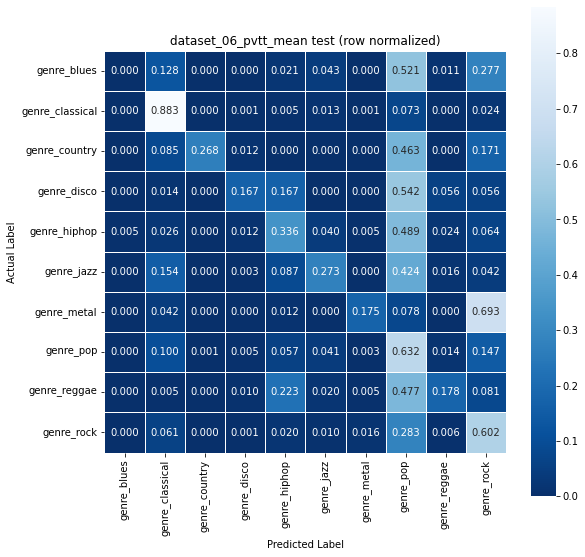



Commencing Experiment: KNeighborsClassifier_dataset_07_pvtt_mean_cov

Training accuracy: train_accuracy = 0.620316

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.6250  0.0134    0.0262      374  0.0892
  genre_classical     0.8115  0.8740    0.8416     4221  0.7879
    genre_country     0.9143  0.1957    0.3224      327  0.4190
      genre_disco     0.4127  0.0900    0.1477      289  0.1867
     genre_hiphop     0.6124  0.3186    0.4192     1701  0.4003
       genre_jazz     0.5873  0.4529    0.5114     1241  0.4830
      genre_metal     0.7651  0.3624    0.4918      665  0.5146
        genre_pop     0.4903  0.6848    0.5715     4274  0.4063
     genre_reggae     0.5486  0.5013    0.5239      788  0.5025
       genre_rock     0.6046  0.6700    0.6356     3200  0.5474
                                                               
         accuracy                    

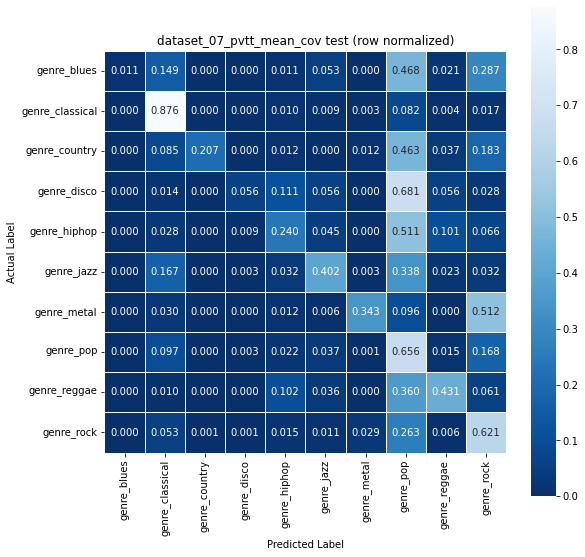



Commencing Experiment: KNeighborsClassifier_dataset_08_pvtt_mean_icov

Training accuracy: train_accuracy = 0.600059

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  0.0080    0.0159      374  0.0886
  genre_classical     0.8126  0.8823    0.8460     4221  0.7938
    genre_country     0.8824  0.1376    0.2381      327  0.3447
      genre_disco     0.4138  0.0830    0.1383      289  0.1796
     genre_hiphop     0.4788  0.3792    0.4232     1701  0.3706
       genre_jazz     0.5393  0.3151    0.3978     1241  0.3785
      genre_metal     0.7225  0.2466    0.3677      665  0.4101
        genre_pop     0.4736  0.6951    0.5634     4274  0.3929
     genre_reggae     0.5258  0.2716    0.3582      788  0.3572
       genre_rock     0.6072  0.6462    0.6261     3200  0.5370
                                                               
         accuracy                   

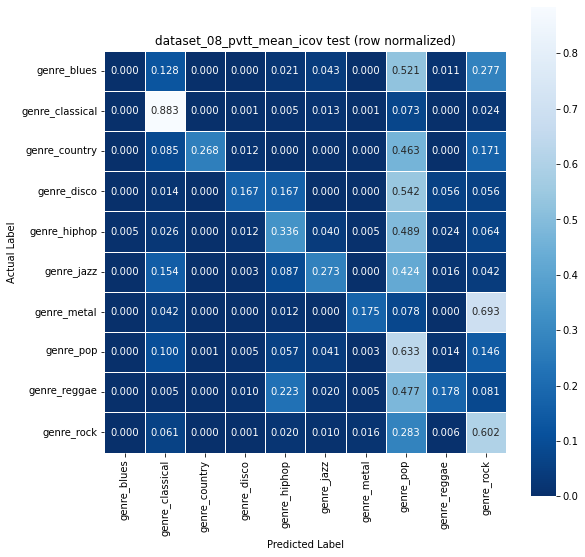



Commencing Experiment: KNeighborsClassifier_dataset_09_pvtt_mean_cov_icov

Training accuracy: train_accuracy = 0.620258

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.6250  0.0134    0.0262      374  0.0892
  genre_classical     0.8115  0.8740    0.8416     4221  0.7879
    genre_country     0.9143  0.1957    0.3224      327  0.4190
      genre_disco     0.4127  0.0900    0.1477      289  0.1867
     genre_hiphop     0.6124  0.3186    0.4192     1701  0.4003
       genre_jazz     0.5877  0.4537    0.5121     1241  0.4837
      genre_metal     0.7651  0.3624    0.4918      665  0.5146
        genre_pop     0.4902  0.6848    0.5714     4274  0.4062
     genre_reggae     0.5486  0.5013    0.5239      788  0.5025
       genre_rock     0.6044  0.6694    0.6352     3200  0.5469
                                                               
         accuracy               

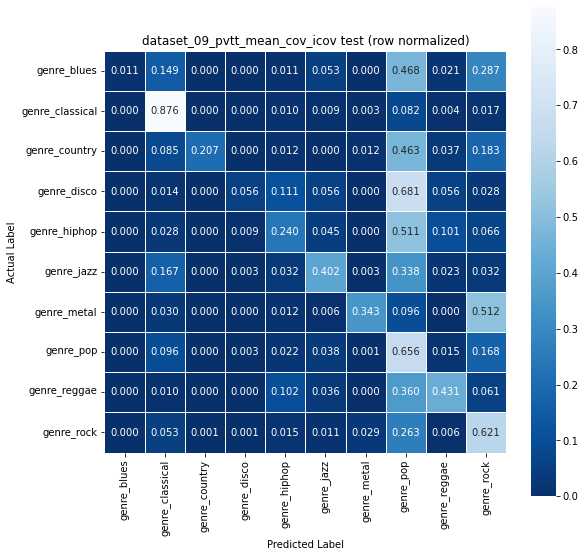



Commencing Experiment: KNeighborsClassifier_dataset_10_melspecs_flat

Training accuracy: train_accuracy = 0.417740



/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.0000  0.0000    0.0000      374  0.0000
  genre_classical     0.4387  0.9514    0.6005     4221  0.4773
    genre_country     0.0000  0.0000    0.0000      327  0.0000
      genre_disco     0.0000  0.0000    0.0000      289  0.0000
     genre_hiphop     1.0000  0.0006    0.0012     1701  0.0230
       genre_jazz     0.4670  0.0741    0.1280     1241  0.1641
      genre_metal     0.3816  0.4316    0.4051      665  0.3802
        genre_pop     0.4789  0.1642    0.2446     4274  0.1617
     genre_reggae     0.0000  0.0000    0.0000      788  0.0000
       genre_rock     0.3697  0.6366    0.4677     3200  0.3225
                                                               
         accuracy                       0.4177    17080  0.2863
        macro avg     0.3136  0.2259    0.1847    17080        
     weighted avg     0.445

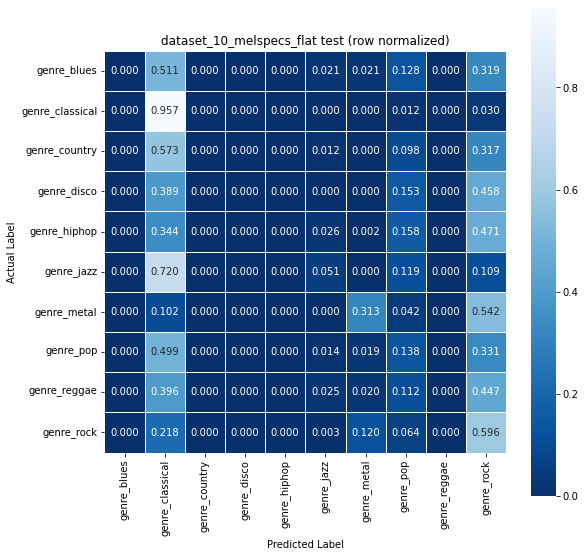

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

for dataset in datasets:
    model = KNeighborsClassifier(n_neighbors=30)
    experiment(model, dataset, result_filename="rich_results.json")